# Student Exam Score Prediction

## Life cycle of This Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. Answers to find from these data are :
- How effective is the test preparation course?
- Which major factors contribute to test outcomes?
- What would be the best way to improve student scores on each test?
- What patterns and interactions in the data can you find? Let me know in the comments section below.

### Data Source
- Dataset Source - http://roycekimmons.com/tools/generated_data/exams
- The data consists of 8 column and 1000 rows.

### Dataset information
- gender : Sex of students (Male/female)
- race_ethnicity : Ethnicity of students (group A, group B, group C, group D, group E)
- parental_level_of_education : Parents' final education (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : Having lunch before test (standard or free/reduced)
- test_preparation_course : Complete or not complete before test (none/completed)
- math_score : Math score by the student.
- reading_score : Reading score by the student.
- writing_score : Writing score by the student.

In [1]:
# Check if the virtual enviornment is in use
import sys
sys.executable

'D:\\env\\Scripts\\python.exe'

In [2]:
# Import Data and Required Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'D:\\score_prediction\\notebooks'

In [4]:
# Path to the raw data
DATA_PATH = 'data/raw_data/data.csv'

In [5]:
# Import the CSV data as Pandas DataFrame
df = pd.read_csv(filepath_or_buffer=DATA_PATH)

In [6]:
# Show first 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Check

In [7]:
# Shape of the dataset
df.shape

(1000, 8)

In [8]:
# Check Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
number_of_missing_values_list = df.isna().sum().unique().tolist()
if (len(number_of_missing_values_list) == 1) and (number_of_missing_values_list[0] == 0):
    print('[INFO...] There are NO MISSING values in the dataset.')
else:
    print('[INFO...] There are MISSING values in the dataset.')

[INFO...] There are NO MISSING values in the dataset.


In [10]:
# Check Duplicates
df.duplicated().sum()

0

In [11]:
number_of_duplicate_values_list = df.isna().sum().unique().tolist()
if (len(number_of_duplicate_values_list) == 1) and (number_of_duplicate_values_list[0] == 0):
    print('[INFO...] There are NO DUPLICATE values in the dataset.')
else:
    print('[INFO...] There are DUPLICATE values in the dataset.')

[INFO...] There are NO DUPLICATE values in the dataset.


In [12]:
# Check data type
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [13]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# Check the number of unique values for each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
# Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
# Insight
print('From above description of numerical data:')
print('All means (math, reading & writting) are very close to each other - between 66 and 68.')
print('All SD are also close to each other - between 14.6 and 15.19.')
print('Minimum score is 0 for math and 10 for writing, for reading its higher = 17.')

From above description of numerical data:
All means (math, reading & writting) are very close to each other - between 66 and 68.
All SD are also close to each other - between 14.6 and 15.19.
Minimum score is 0 for math and 10 for writing, for reading its higher = 17.


In [17]:
# Check various categories present in the different categorical column
print("Unique in 'gender' : {}".format(df['gender'].unique()))
print("Unique in 'race_ethnicity' : {}".format(df['race_ethnicity'].unique()))
print("Unique in'parental_level_of_education' : {}".format(df['parental_level_of_education'].unique()))
print("Unique in 'lunch' feature : {}".format(df['lunch'].unique()))
print("Unique in 'test preparation course' feature : {}".format(df['test_preparation_course'].unique()))

Unique in 'gender' : ['female' 'male']
Unique in 'race_ethnicity' : ['group B' 'group C' 'group A' 'group D' 'group E']
Unique in'parental_level_of_education' : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique in 'lunch' feature : ['standard' 'free/reduced']
Unique in 'test preparation course' feature : ['none' 'completed']


In [18]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('Total {0} Numerical features : {1}'.format(len(numeric_features), numeric_features))
print('Total {0} Categorical features : {1}'.format(len(categorical_features), categorical_features))

Total 3 Numerical features : ['math_score', 'reading_score', 'writing_score']
Total 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
# Adding columns for 'total_score' and 'avg_score'
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = (df['total_score'] / 3).round(2)

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [21]:
stu_with_full_score_reading = df[df['reading_score']==100]['avg_score'].count()
stu_with_full_score_writting = df[df['writing_score']==100]['avg_score'].count()
stu_with_full_score_math = df[df['math_score']==100]['avg_score'].count()

print(f'Number of students with 100 score in Reading : {stu_with_full_score_reading}.')
print(f'Number of students with 100 score in Writing : {stu_with_full_score_writting}.')
print(f'Number of students with 100 score in Maths : {stu_with_full_score_math}.')

Number of students with 100 score in Reading : 17.
Number of students with 100 score in Writing : 14.
Number of students with 100 score in Maths : 7.


In [22]:
# Insights
print('[INFO...] Lowest number of students got 100 score in Maths.')
print('[INFO...] Highest number of students got 100 score in Reading.')

[INFO...] Lowest number of students got 100 score in Maths.
[INFO...] Highest number of students got 100 score in Reading.


## Exploratory data analysis

### Data Visualization

#### Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

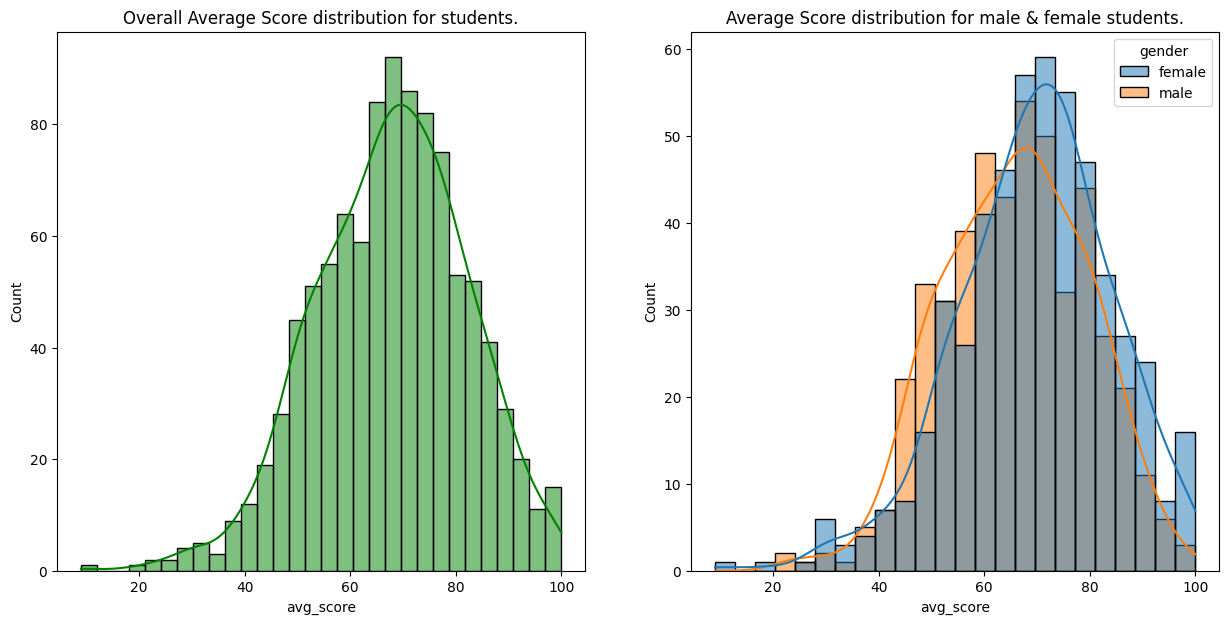

In [23]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(15, 7))
plt.subplot(121)
sns.histplot(x='avg_score',
             data=df,
             bins=30,
             kde=True,
             color='g')
plt.title(label='Overall Average Score distribution for students.')

plt.subplot(122)
sns.histplot(x='avg_score',
             data=df,
             kde=True,
             hue='gender')
plt.title(label='Average Score distribution for male & female students.');

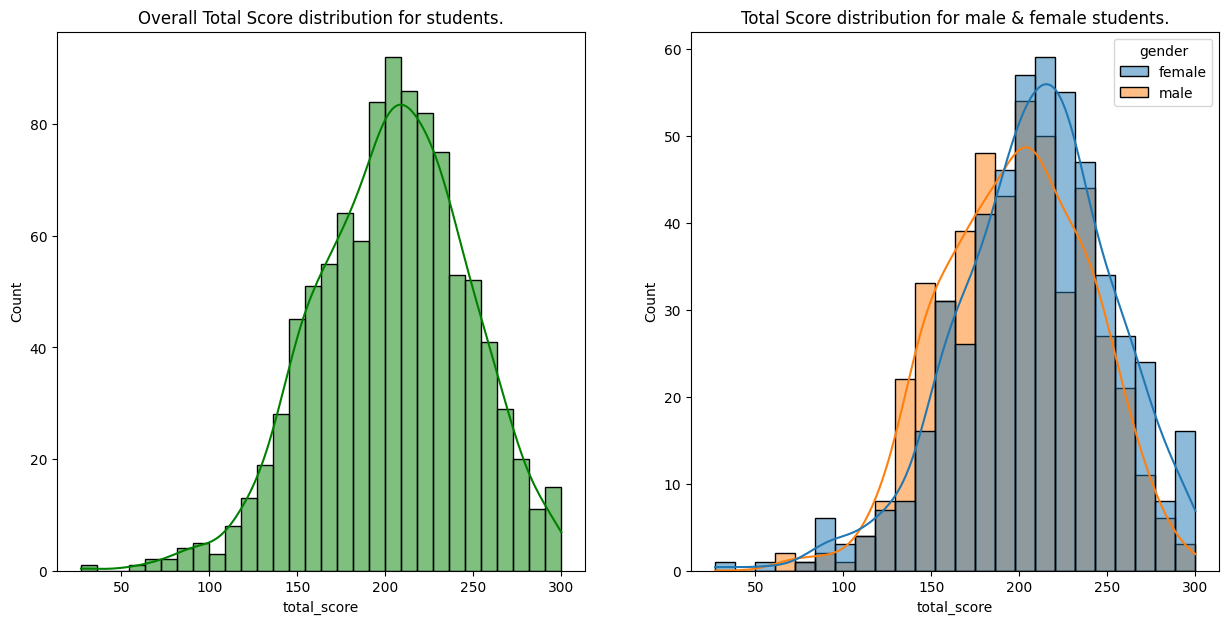

In [24]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(15, 7))
plt.subplot(121)
sns.histplot(x='total_score',
             data=df,
             bins=30,
             kde=True,
             color='g')
plt.title(label='Overall Total Score distribution for students.')

plt.subplot(122)
sns.histplot(x='total_score',
             data=df,
             kde=True,
             hue='gender')
plt.title(label='Total Score distribution for male & female students.');

In [25]:
# Insights
print('[INFO...] Female students tend to perform well then male students.')

[INFO...] Female students tend to perform well then male students.


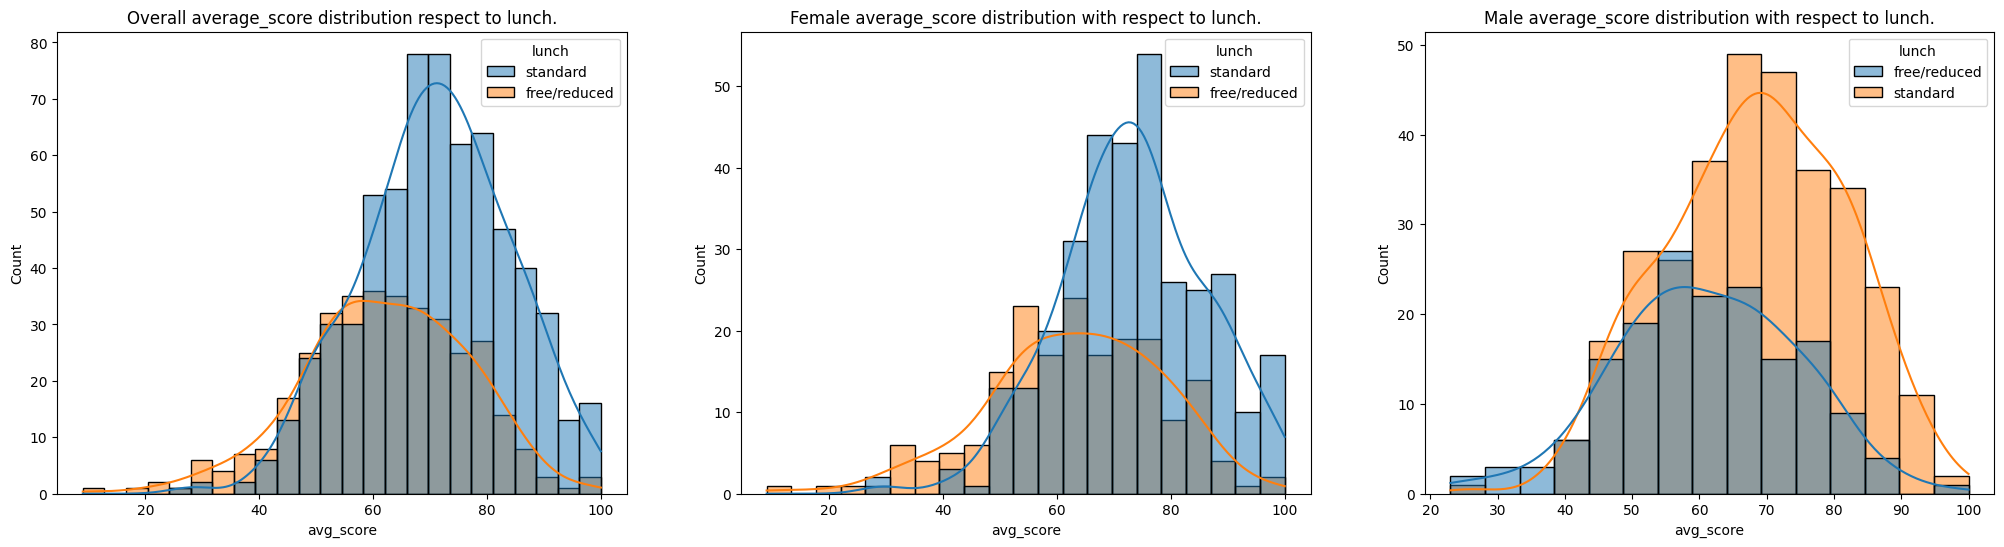

In [26]:
fig, axs = plt.subplots(nrows=1,
                        ncols=3,
                        figsize=(25,6))
plt.subplot(131)
sns.histplot(x='avg_score',
             data=df,
             kde=True,
             hue='lunch')
plt.title(label='Overall average_score distribution respect to lunch.')

plt.subplot(132)
sns.histplot(x='avg_score',
             data=df[df.gender=='female'],
             kde=True,
             hue='lunch')
plt.title(label='Female average_score distribution with respect to lunch.')

plt.subplot(133)
sns.histplot(x='avg_score',
             data=df[df.gender=='male'],
             kde=True,
             hue='lunch')
plt.title(label='Male average_score distribution with respect to lunch.');

In [27]:
# Insights
print('[INFO...] Standard lunch helps perform well in exams.')
print('[INFO...] Standard lunch helps perform well in exams for both male and female.')

[INFO...] Standard lunch helps perform well in exams.
[INFO...] Standard lunch helps perform well in exams for both male and female.


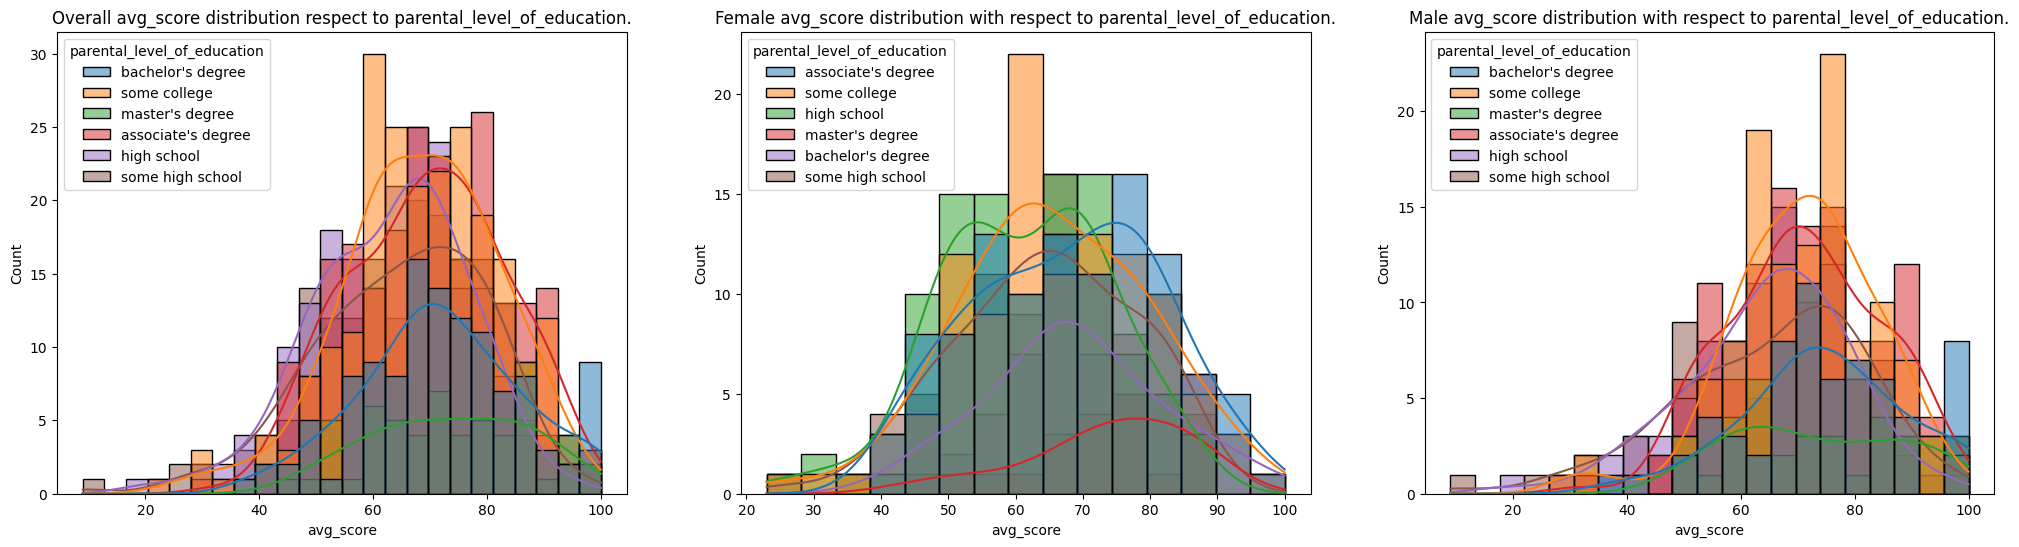

In [28]:
plt.subplots(nrows=1,
             ncols=3,
             figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(x='avg_score',
                 data=df,
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Overall avg_score distribution respect to parental_level_of_education.')

plt.subplot(132)
ax =sns.histplot(x='avg_score',
                 data=df[df.gender=='male'],
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Female avg_score distribution with respect to parental_level_of_education.')

plt.subplot(133)
ax =sns.histplot(x='avg_score',
                 data=df[df.gender=='female'],
                 kde=True,
                 hue='parental_level_of_education')
plt.title(label='Male avg_score distribution with respect to parental_level_of_education.');

In [29]:
# Insights
print("[INFO...] In general parent's education don't help student perform well in exam.")
print("[INFO...] 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.")
print("[INFO...] 3rd plot we can see there is no effect of parent's education on female students.")

[INFO...] In general parent's education don't help student perform well in exam.
[INFO...] 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
[INFO...] 3rd plot we can see there is no effect of parent's education on female students.


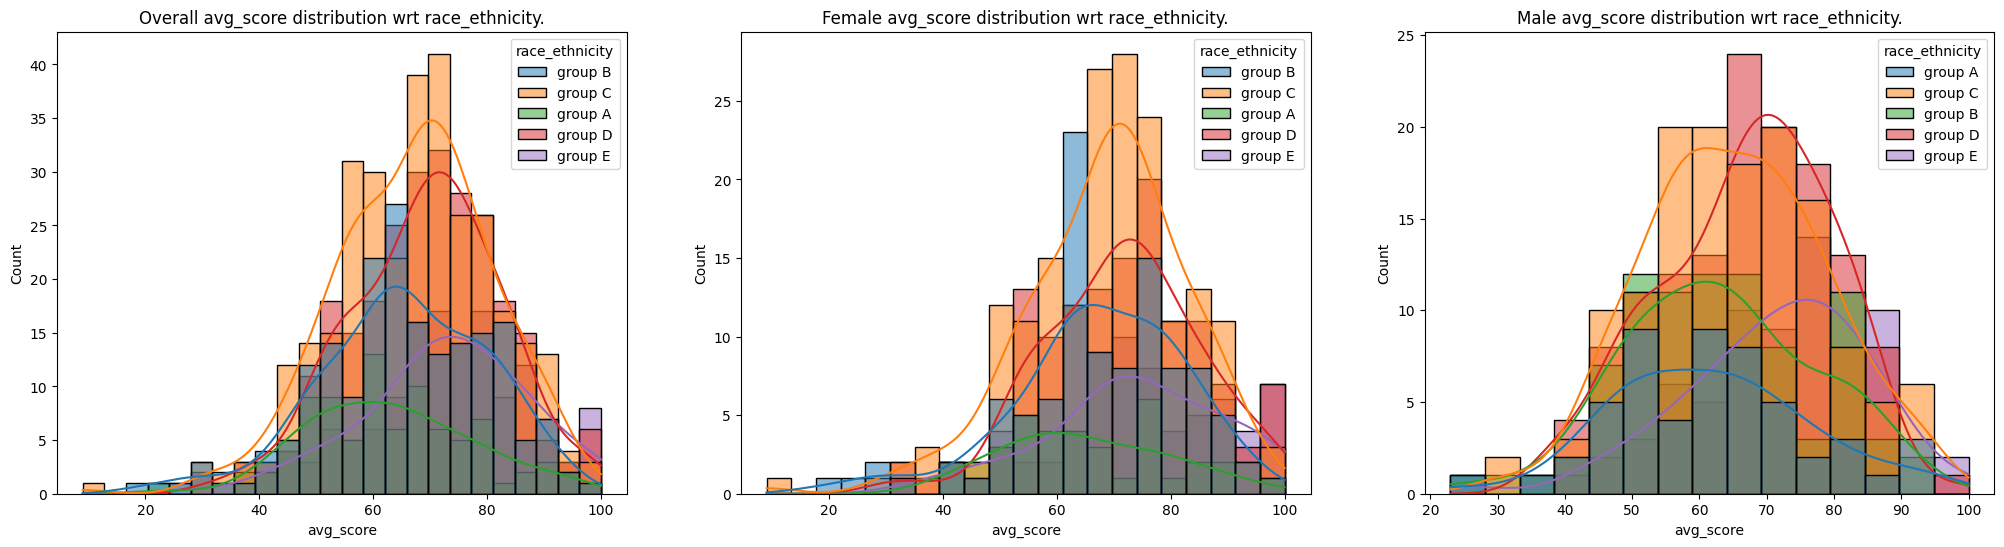

In [30]:
plt.subplots(nrows=1,
             ncols=3,
             figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(x='avg_score',
                 data=df,
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Overall avg_score distribution wrt race_ethnicity.')

plt.subplot(132)
ax =sns.histplot(x='avg_score',
                 data=df[df.gender=='female'],
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Female avg_score distribution wrt race_ethnicity.')

plt.subplot(133)
ax =sns.histplot(x='avg_score',
                 data=df[df.gender=='male'],
                 kde=True,
                 hue='race_ethnicity')
plt.title(label='Male avg_score distribution wrt race_ethnicity.');

In [31]:
# Insights
print('[INFO...] Students of group A and group B tends to perform poorly in exam.')
print('[INFO...] Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.')

[INFO...] Students of group A and group B tends to perform poorly in exam.
[INFO...] Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.


#### Maximumum score of students in all three subjects

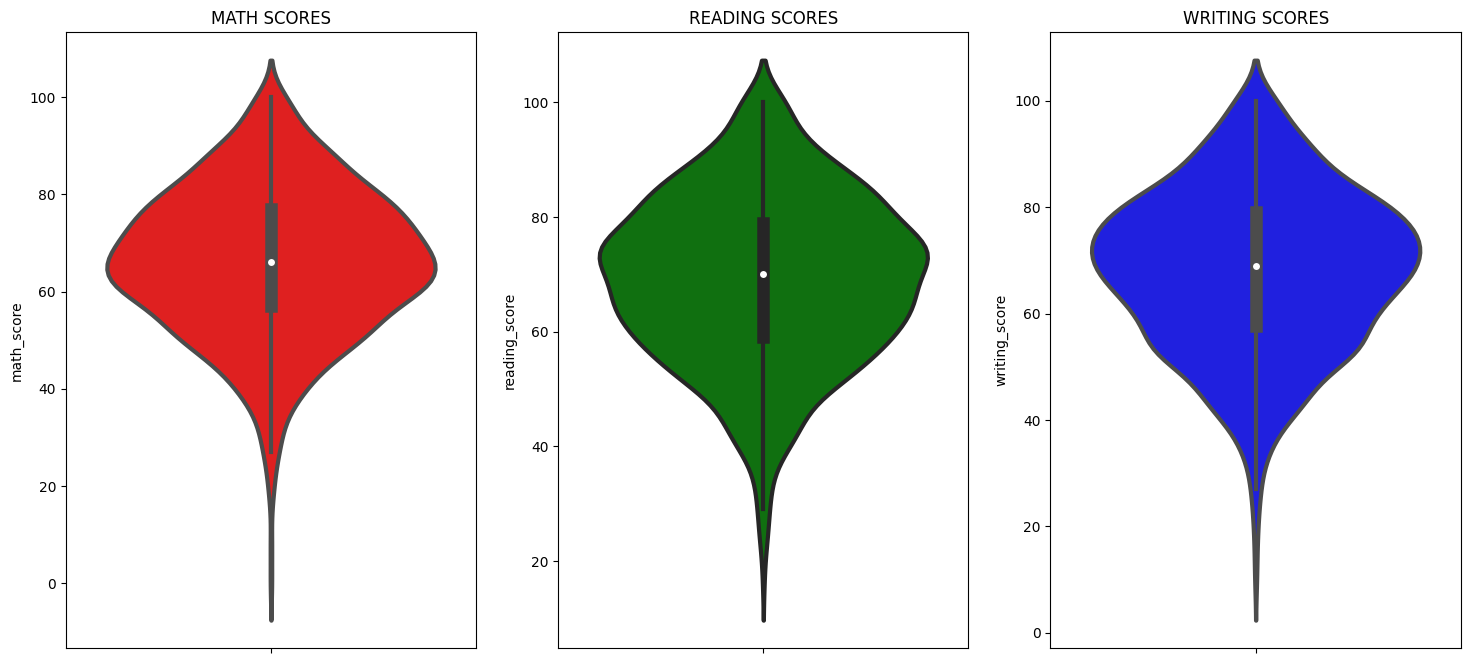

In [32]:
plt.subplots(nrows=1,
             ncols=3,
             figsize=(18,8))


plt.subplot(131)
plt.title(label='MATH SCORES')
sns.violinplot(y='math_score',
               data=df,
               color='red',
               linewidth=3)

plt.subplot(132)
plt.title(label='READING SCORES')
sns.violinplot(y='reading_score',
               data=df,
               color='green',
               linewidth=3)

plt.subplot(133)
plt.title(label='WRITING SCORES')
sns.violinplot(y='writing_score',
               data=df,
               color='blue',
               linewidth=3);

In [33]:
# Insights
print('[INFO...] From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80')

[INFO...] From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


#### Multivariate analysis using pieplot

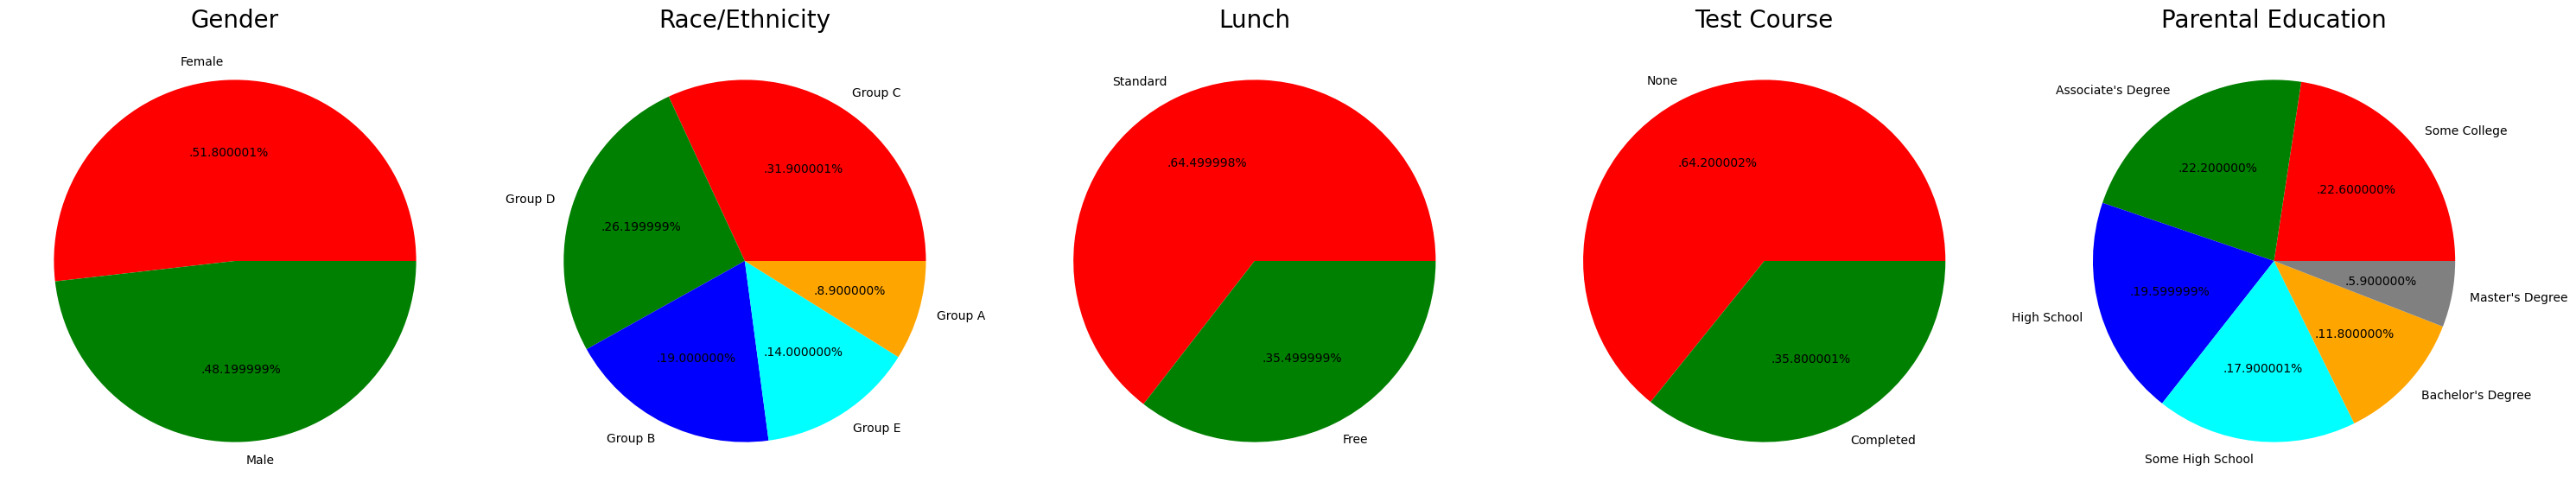

In [34]:
plt.rcParams['figure.figsize']=(30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Gender',
          fontsize = 20)
plt.axis('off')


plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct = '.%2f%%')
plt.title(label='Race/Ethnicity',
          fontsize = 20)
plt.axis('off')


plt.subplot(153)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Lunch',
          fontsize = 20)
plt.axis('off')


plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']


plt.pie(x=size, 
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Test Course',
          fontsize = 20)
plt.axis('off')


plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']


plt.pie(x=size,
        colors=color,
        labels=labels,
        autopct='.%2f%%')
plt.title(label='Parental Education',
          fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid();

In [35]:
# Insights
print('[INFO] Number of Male and Female students is almost equal.')
print('[INFO] Number students are greatest in Group C.')
print('[INFO] Number of students who have standard lunch are greater.')
print('[INFO] Number of students who have not enrolled in any test preparation course is greater.')
print("[INFO] Number of students whose parental education is 'Some College' is greater followed closely by 'Associate's Degree.")

[INFO] Number of Male and Female students is almost equal.
[INFO] Number students are greatest in Group C.
[INFO] Number of students who have standard lunch are greater.
[INFO] Number of students who have not enrolled in any test preparation course is greater.
[INFO] Number of students whose parental education is 'Some College' is greater followed closely by 'Associate's Degree.


### Feature Wise Visualization

#### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How Gender is distributed?)

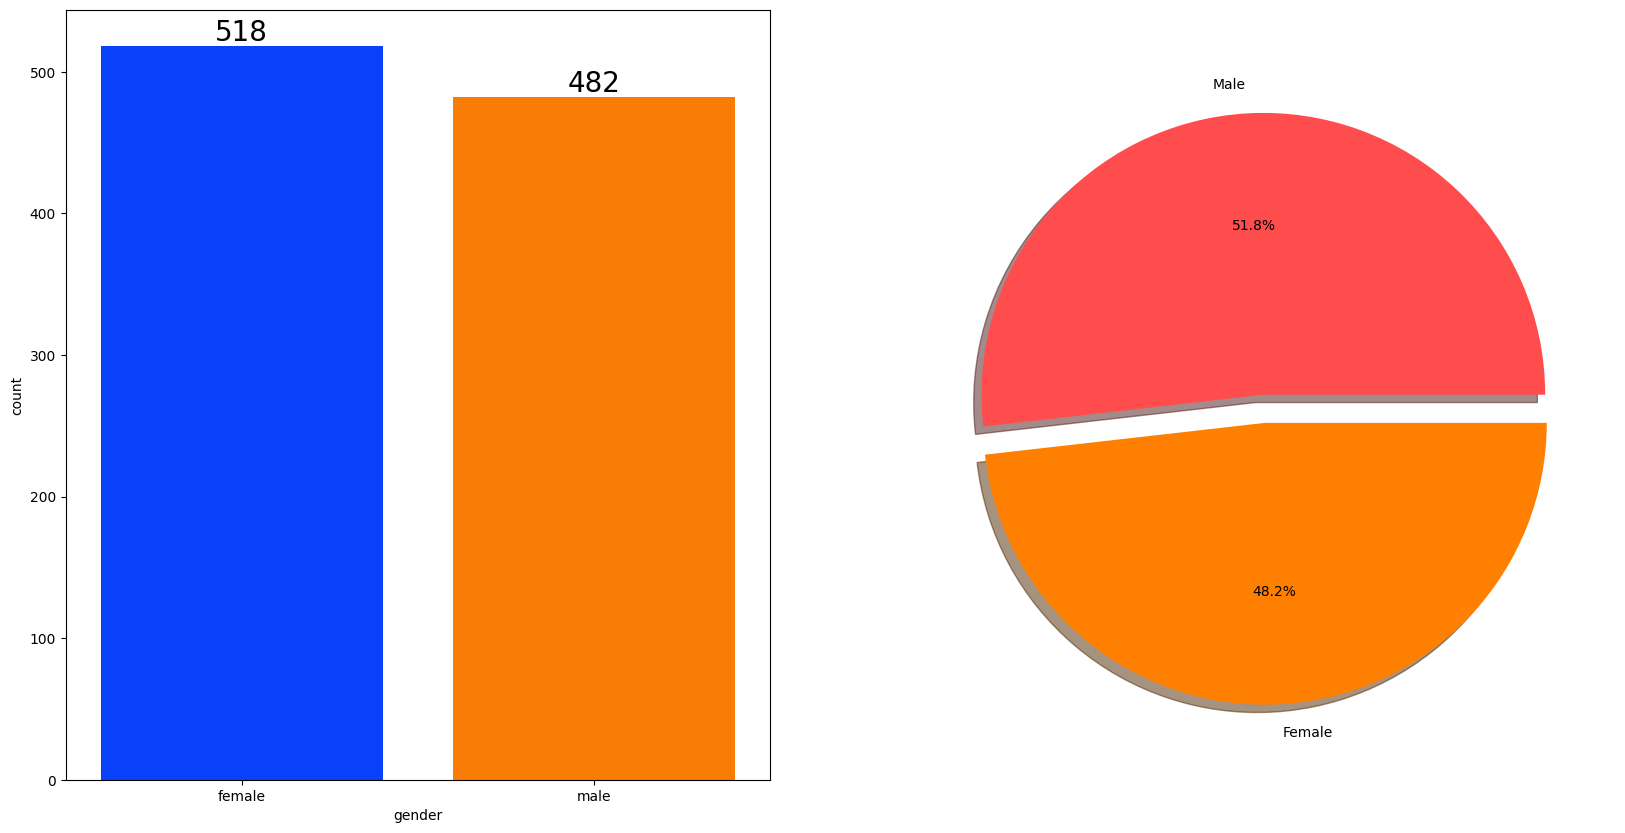

In [36]:
fig, axs=plt.subplots(nrows=1, 
                      ncols=2, 
                      figsize=(20,10))

sns.countplot(x=df['gender'],
              data=df,
              palette='bright',
              ax=axs[0],
              saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container=container,
                     color='black',
                     size=20)
    
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d','#ff8000']);

In [37]:
# Insights
print('[INFO...] Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)')

[INFO...] Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [38]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [39]:
gender_group = df.groupby('gender')[['avg_score', 'math_score']].mean()
gender_group

,avg_score,math_score
gender,,
female,69.569498,63.633205
male,65.837303,68.728216


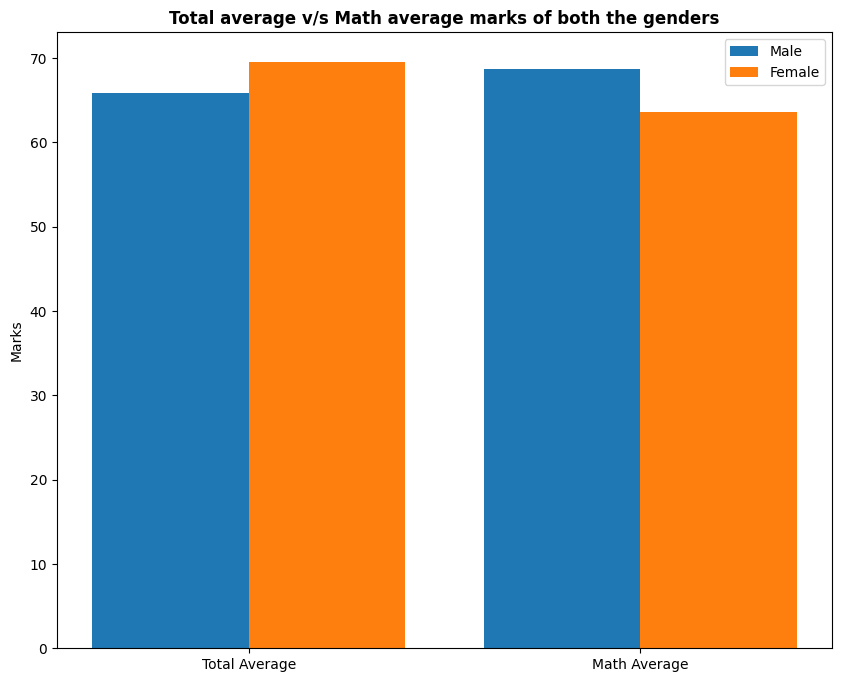

In [40]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['avg_score'][0], 
                 gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1],
               gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(x=X_axis - 0.2,
        height=male_scores,
        width=0.4,
        label = 'Male')

plt.bar(x=X_axis + 0.2,
        height=female_scores,
        width=0.4,
        label='Female')
  
plt.xticks(X_axis, X)
plt.grid(False)
plt.ylabel('Marks')
plt.title(label='Total average v/s Math average marks of both the genders',
          fontweight='bold')
plt.legend();

In [41]:
# Insights
print('[INFO...] On an average females have a better overall score than men.')
print('[INFO...] Whereas males have scored higher in Maths.')

[INFO...] On an average females have a better overall score than men.
[INFO...] Whereas males have scored higher in Maths.


#### RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

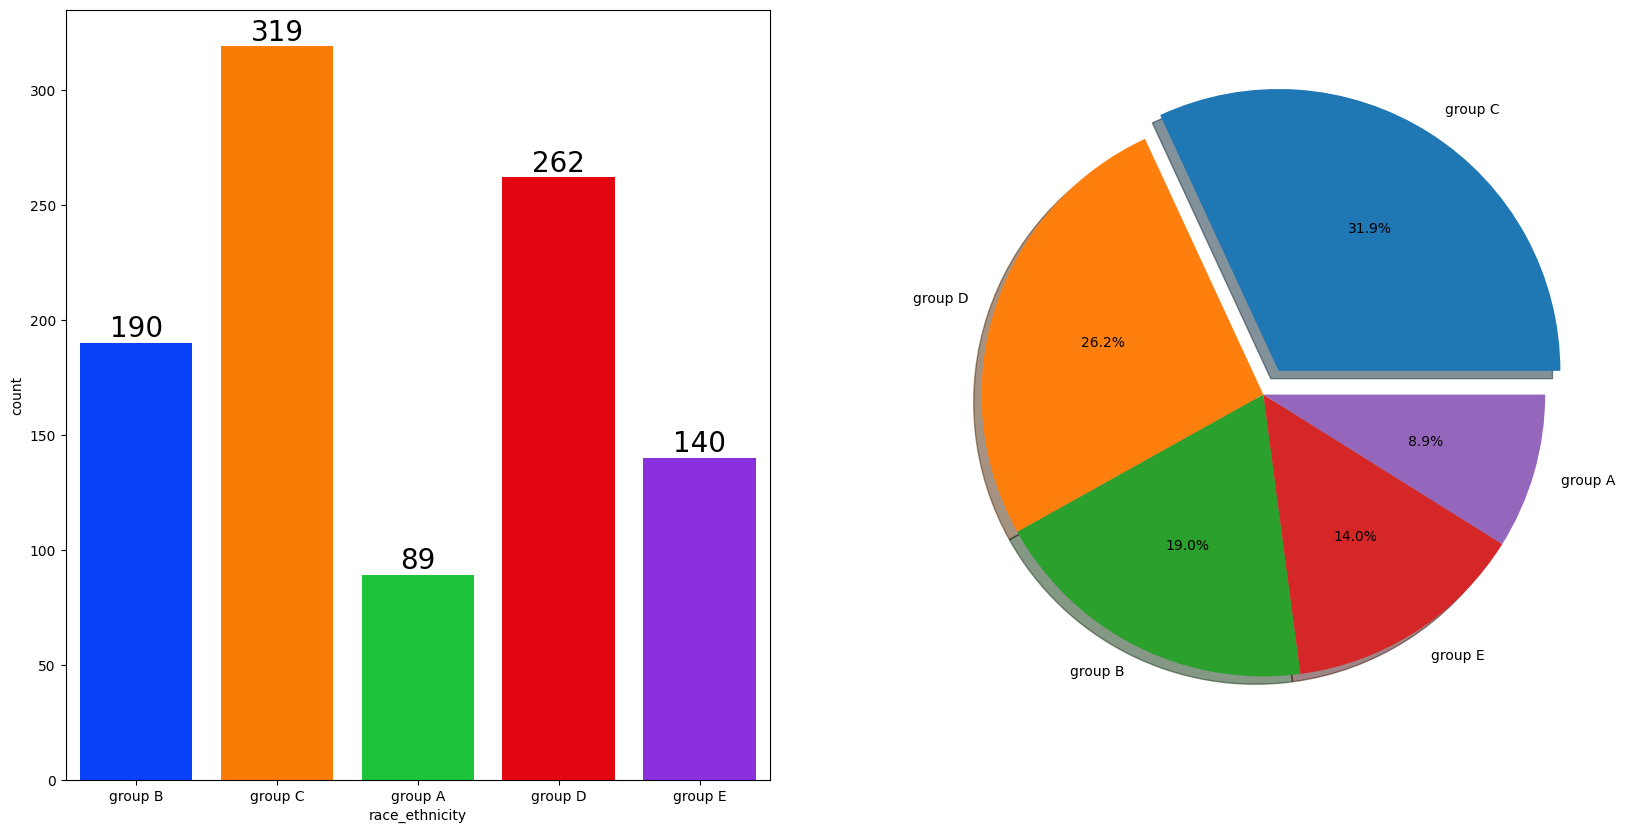

In [42]:
f,ax=plt.subplots(nrows=1,
                  ncols=2,
                  figsize=(20,10))

sns.countplot(x=df['race_ethnicity'],
              data=df,
              palette='bright',
              ax=ax[0],
              saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container=container,
                    color='black',
                    size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0,0, 0, 0],
        autopct='%1.1f%%',
        shadow=True);

In [43]:
# Insights
print('[INFO...] Most of the student belonging from group C /group D.')
print('[INFO...] Lowest number of students belong to groupA.')

[INFO...] Most of the student belonging from group C /group D.
[INFO...] Lowest number of students belong to groupA.


#### BIVARIATE ANALYSIS (Is Race/Ehnicity has any impact on student's performance?)

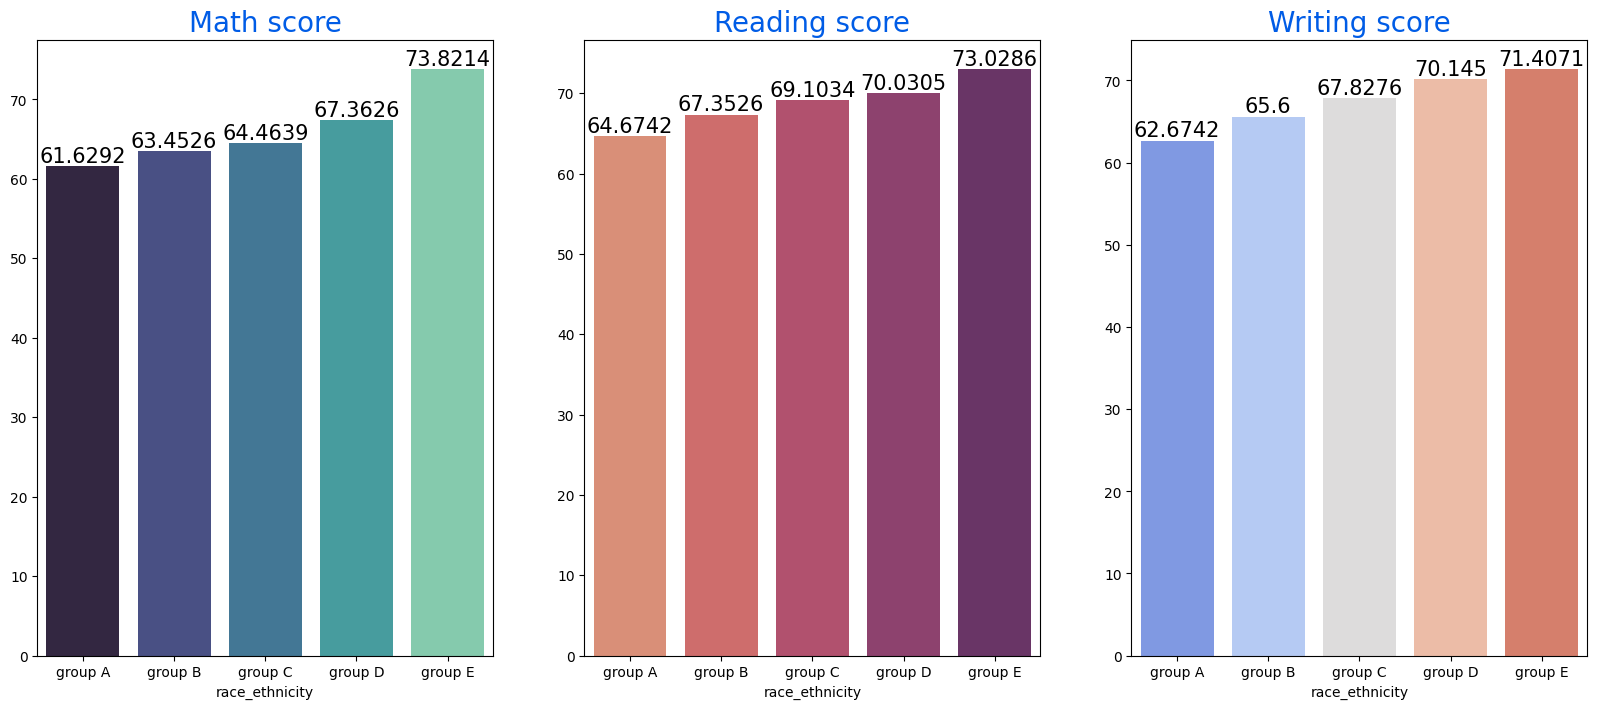

In [44]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(nrows=1,
                  ncols=3,
                  figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,
            y=Group_data2['math_score'].mean().values,
            palette = 'mako',
            ax=ax[0])
ax[0].set_title(label='Math score',
                color='#005ce6',
                size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,
            y=Group_data2['reading_score'].mean().values,
            palette = 'flare',
            ax=ax[1])
ax[1].set_title(label='Reading score',
                color='#005ce6',
                size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,
            y=Group_data2['writing_score'].mean().values,
            palette='coolwarm',
            ax=ax[2])
ax[2].set_title(label='Writing score',
                color='#005ce6',
                size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,
                    color='black',
                    size=15)

In [45]:
# Insights
print('[INFO...] Group E students have scored the highest marks.')
print('[INFO...] Group A students have scored the lowest marks.')
print('[INFO...] Students from a lower Socioeconomic status have a lower avg in all course subjects.')

[INFO...] Group E students have scored the highest marks.
[INFO...] Group A students have scored the lowest marks.
[INFO...] Students from a lower Socioeconomic status have a lower avg in all course subjects.


##### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

In [46]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


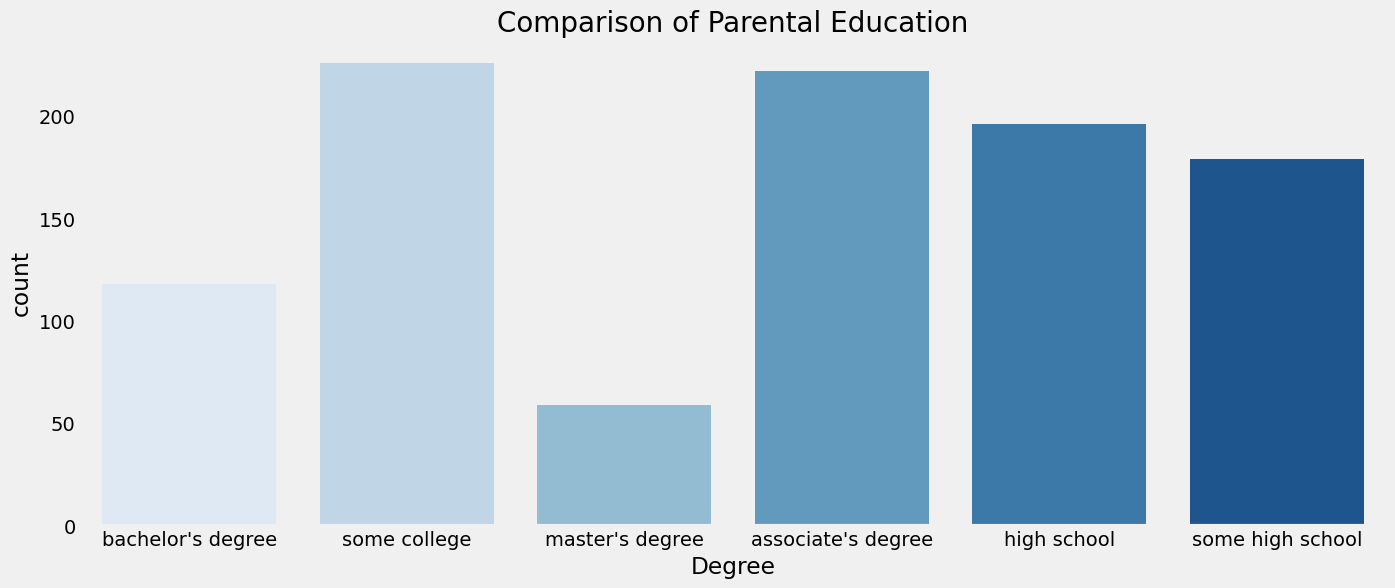

In [47]:
plt.rcParams['figure.figsize']=(15, 6)
plt.style.use('fivethirtyeight')
sns.countplot(x='parental_level_of_education',
              data=df,
              palette='Blues')
plt.title(label='Comparison of Parental Education',
          fontweight=30,
          fontsize=20)
plt.grid(visible=False)
plt.xlabel(xlabel='Degree')
plt.ylabel(ylabel='count');

In [48]:
# Insights
print('[INFO...] Largest number of parents are from some college.')

[INFO...] Largest number of parents are from some college.


##### BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)

In [49]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


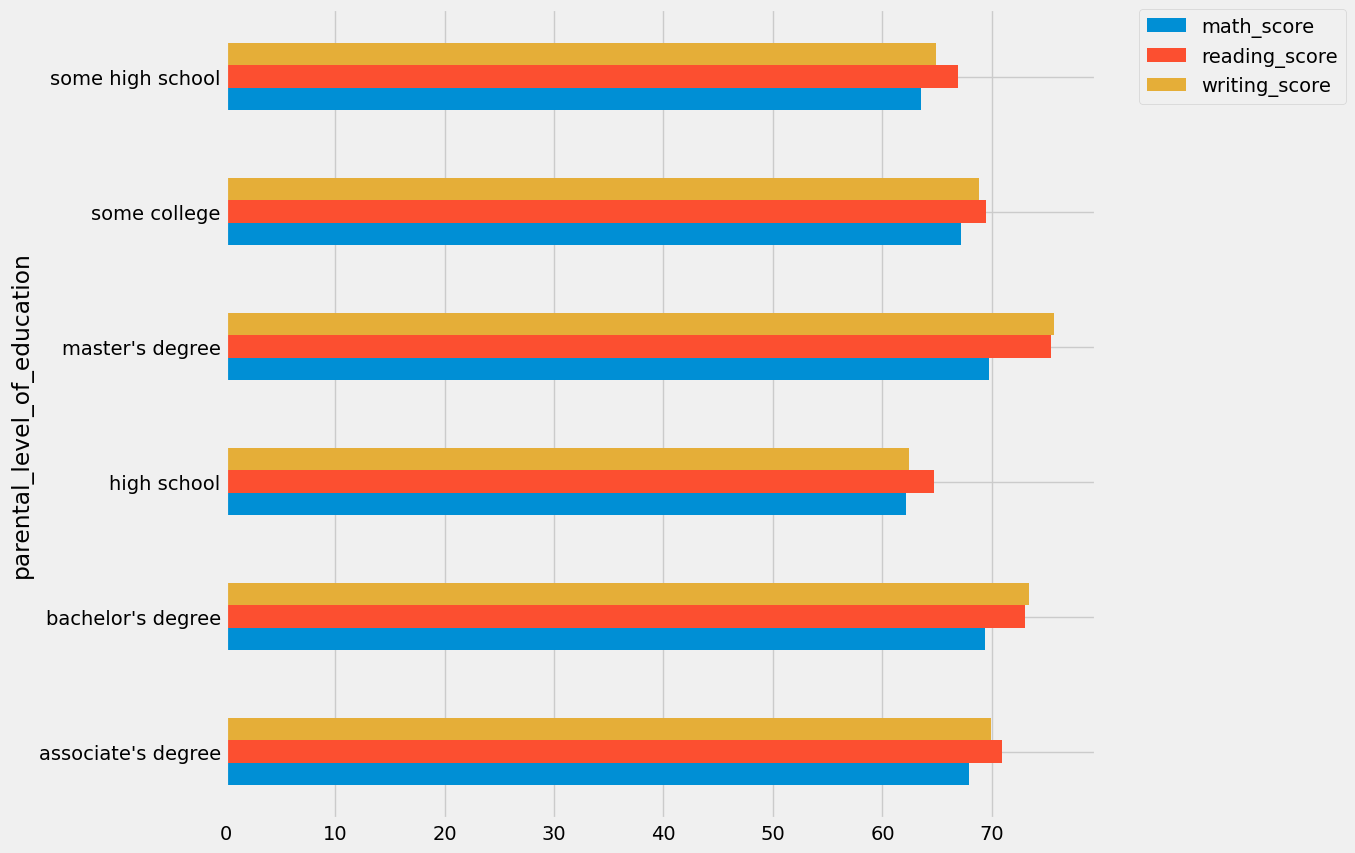

In [50]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].agg('mean').plot(kind='barh',
                                                                                                             figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.);

In [51]:
# Insights
print('[INFO...] The score of student whose parents possess master and bachelor level education are higher than others.')

[INFO...] The score of student whose parents possess master and bachelor level education are higher than others.


#### LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students?)

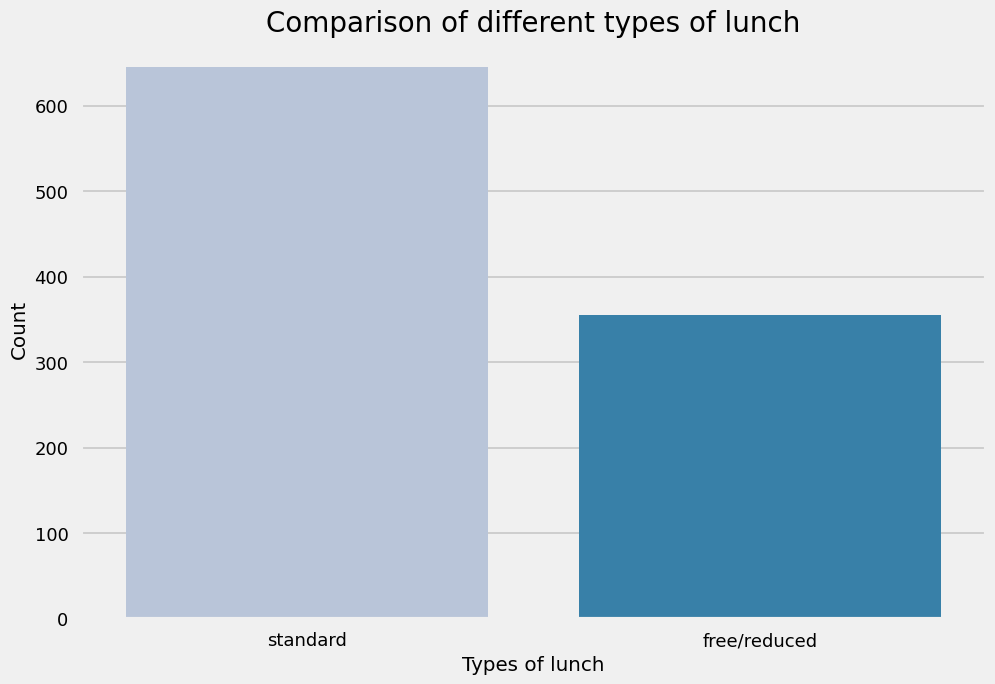

In [52]:
plt.rcParams['figure.figsize']=(6, 6)
plt.style.use('seaborn-talk')
sns.countplot(x='lunch', 
              data=df, 
              palette = 'PuBu')
plt.title(label='Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel(xlabel='Types of lunch')
plt.ylabel(ylabel='Count');

In [53]:
# Insights
print('[INFO...] Students being served Standard lunch was more than free lunch.')

[INFO...] Students being served Standard lunch was more than free lunch.


##### BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance ?)

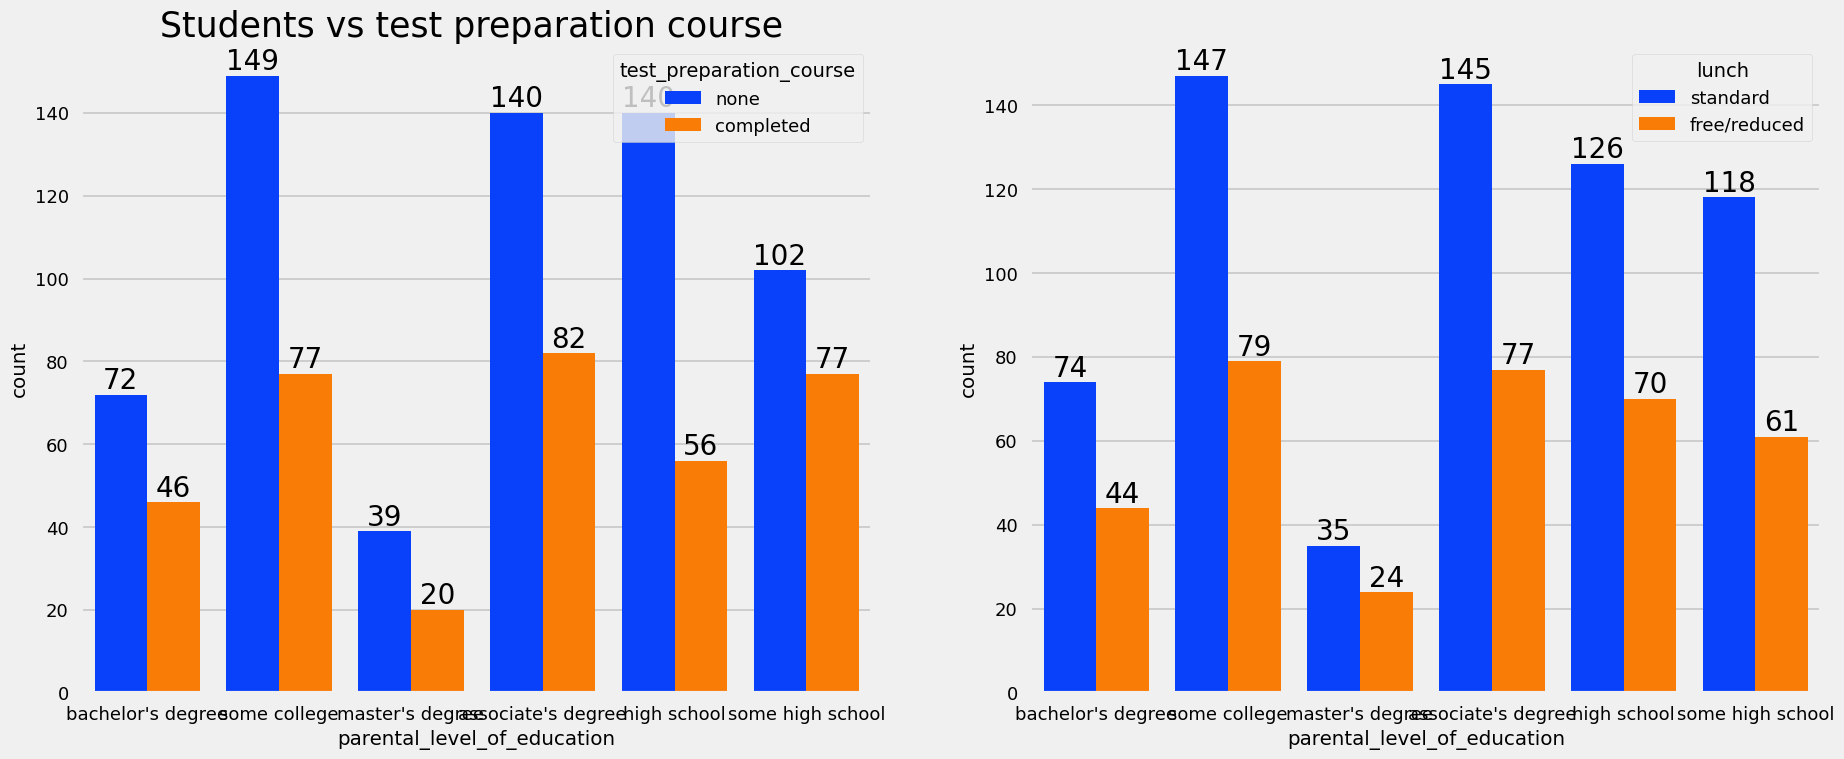

In [54]:
f,ax=plt.subplots(nrows=1,
                  ncols=2,
                  figsize=(20,8))

sns.countplot(x='parental_level_of_education',
              data=df,
              palette='bright',
              hue='test_preparation_course',
              saturation=0.95,
              ax=ax[0])
ax[0].set_title(label='Students vs test preparation course ',
                color='black',
                size=25)

for container in ax[0].containers:
    ax[0].bar_label(container=container,
                    color='black',
                    size=20)
    
sns.countplot(x='parental_level_of_education',
              data=df,
              palette='bright',
              hue='lunch',
              saturation=0.95,
              ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container=container,
                    color='black',
                    size=20)   

In [55]:
# Insights
print('[INFO...] Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.')

[INFO...] Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.


#### TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

##### BIVARIATE ANALYSIS (Is Test prepration course has any impact on student's performance ?)

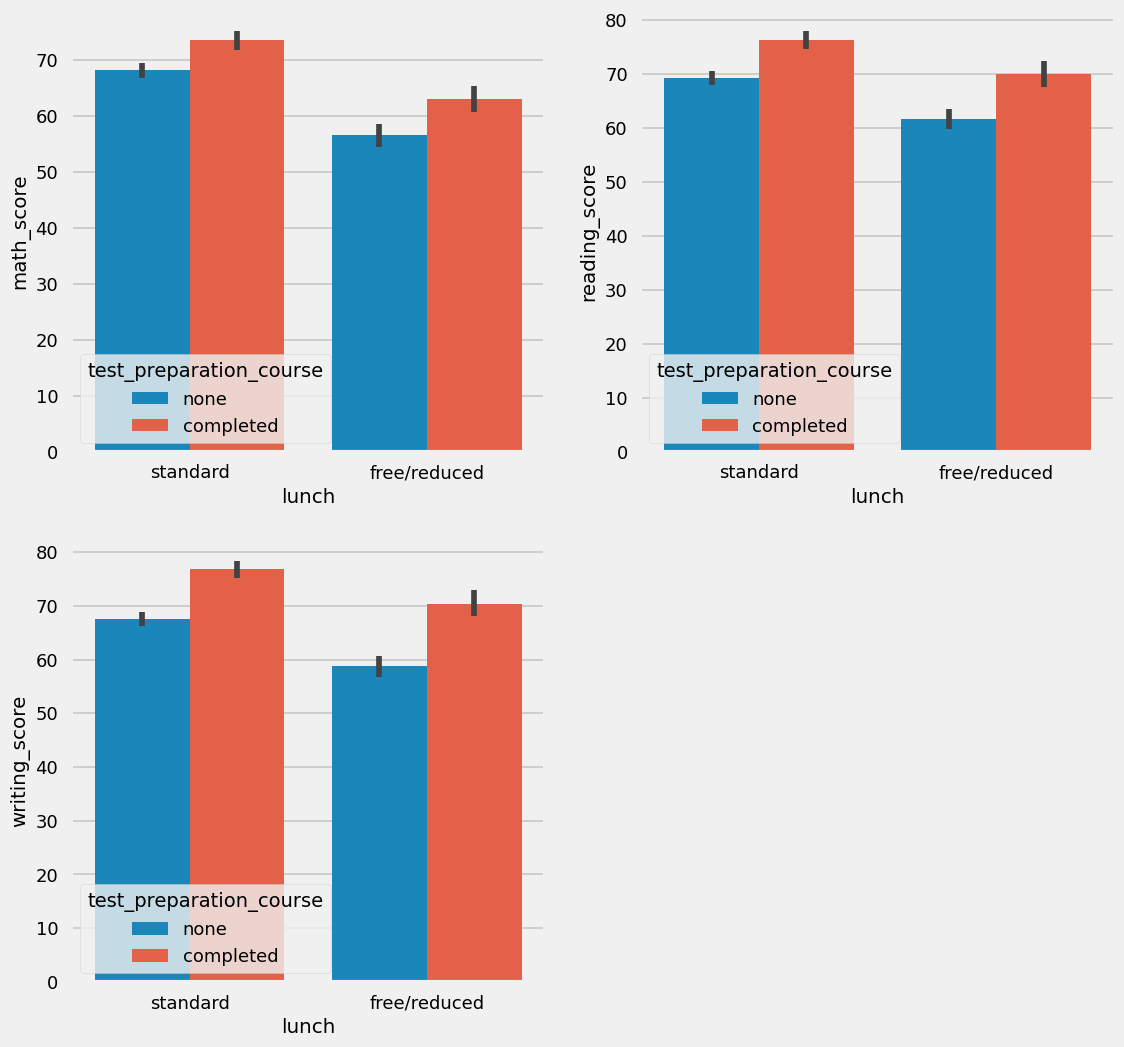

In [56]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
sns.barplot (x='lunch',
             y='math_score',
             data=df,
             hue='test_preparation_course')

plt.subplot(2, 2, 2)
sns.barplot (x='lunch',
             y='reading_score',
             data=df,
             hue='test_preparation_course')

plt.subplot(2, 2, 3)
sns.barplot (x='lunch',
             y='writing_score',
             data=df,
             hue='test_preparation_course');

In [57]:
# Insights
print("[INFO...] Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.")

[INFO...] Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.


### CHECKING OUTLIERS

In [58]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


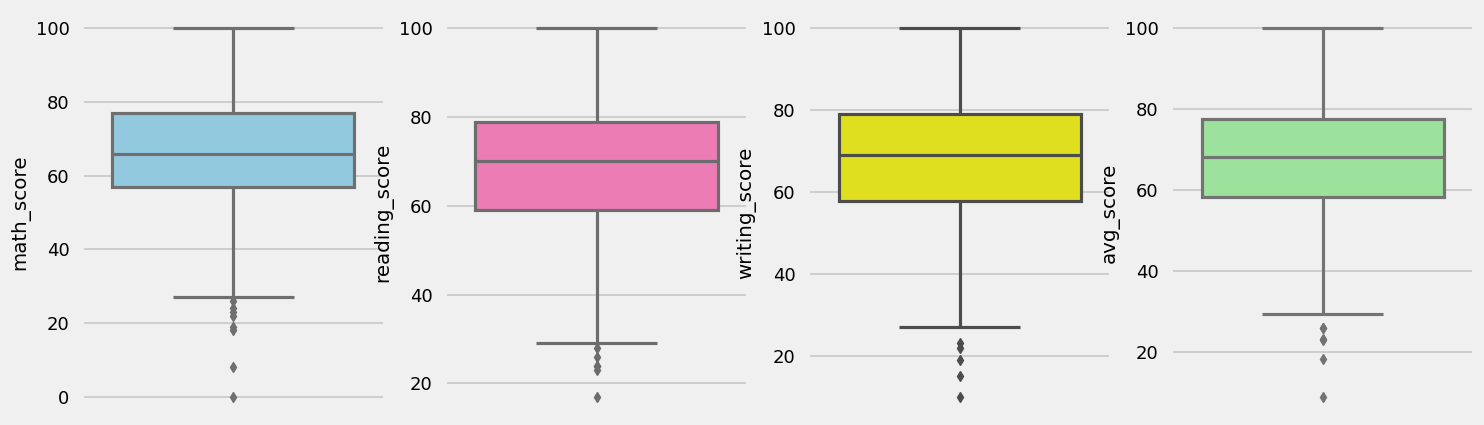

In [59]:
plt.subplots(nrows=1,
             ncols=4,
             figsize=(16,5))

plt.subplot(141)
sns.boxplot(y='math_score',
            data=df,
            color='skyblue')

plt.subplot(142)
sns.boxplot(y='reading_score',
            data=df,
            color='hotpink')

plt.subplot(143)
sns.boxplot(y='writing_score',
            data=df,
            color='yellow')

plt.subplot(144)
sns.boxplot(y='avg_score',
            data=df,
            color='lightgreen');

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

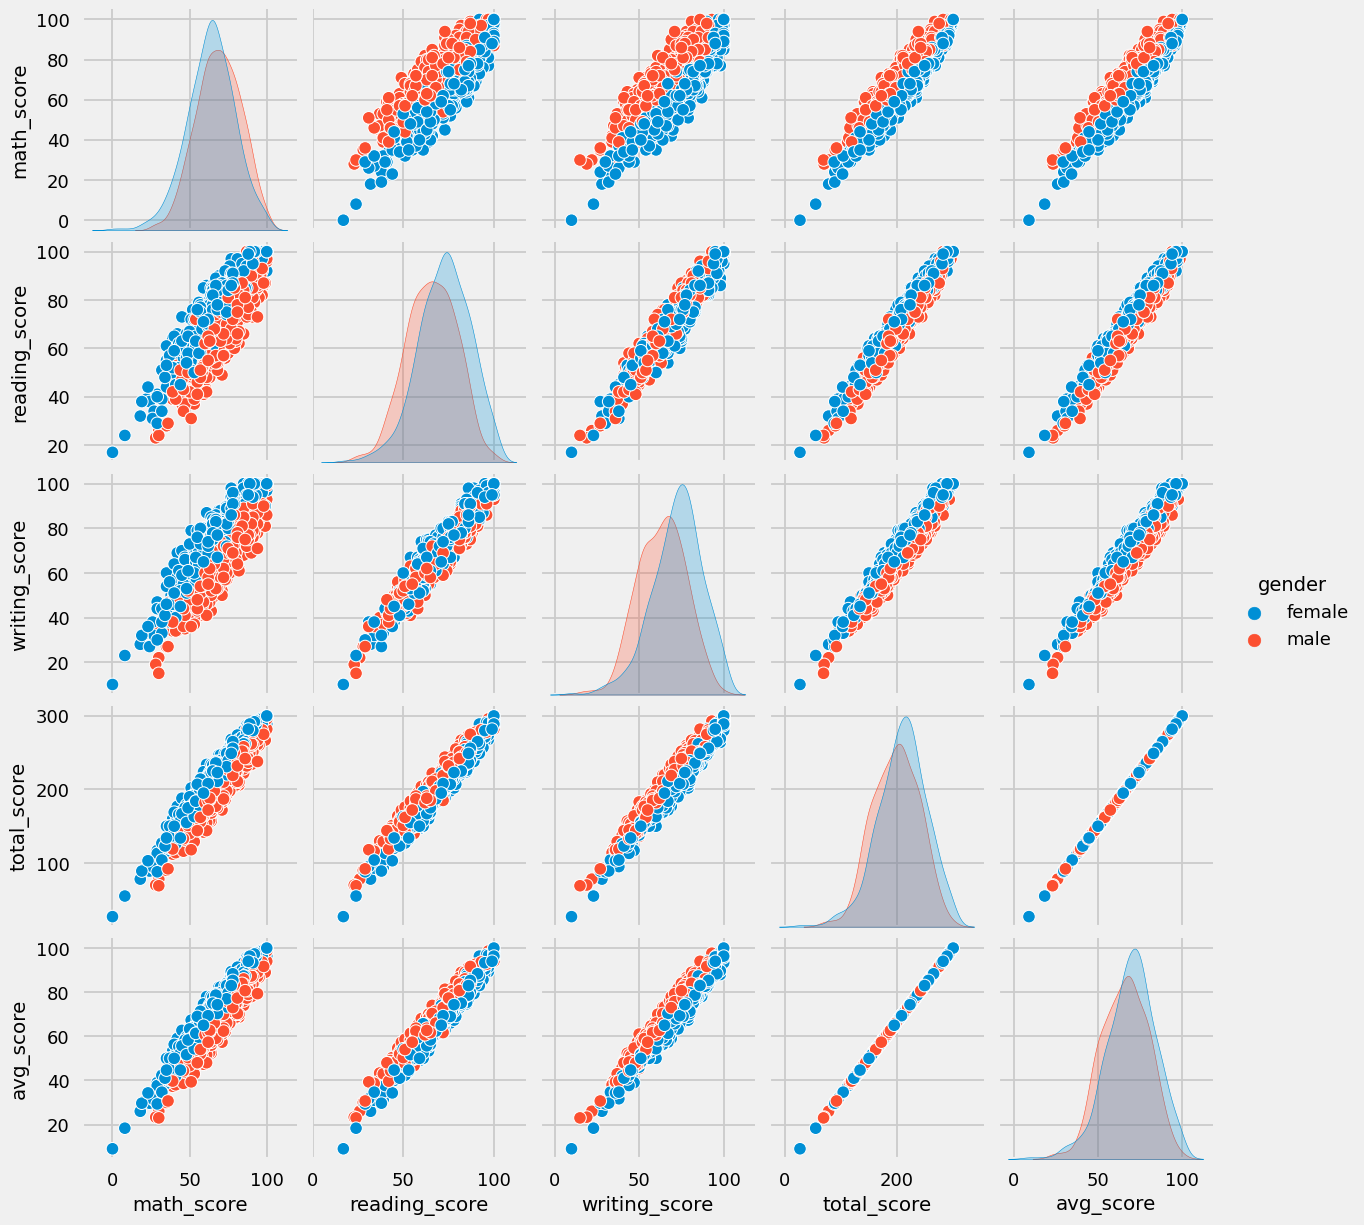

In [60]:
sns.pairplot(data=df, hue='gender');

In [61]:
# Insights
print('[INFO...] From the above plot it is clear that all the scores increase linearly with each other.')

[INFO...] From the above plot it is clear that all the scores increase linearly with each other.
